
    XY HAMILTONIAN THEORY
    
    The XY model is a quantum spin model where spins interact through X and Y components:
    
    H_XY = -J ∑_{⟨i,j⟩} (X_i X_j + Y_i Y_j)
    
    Alternative formulation using ladder operators:
    H_XY = -J/2 ∑_{⟨i,j⟩} (σ+_i σ-_j + σ-_i σ+_j)
    
    where:
    • J > 0: ferromagnetic coupling (prefers aligned spins in XY plane)
    • J < 0: antiferromagnetic coupling
    • σ± = (σ_x ± iσ_y)/2: spin raising/lowering operators
    
    KEY PROPERTIES:
    1. Conserves total S_z = ∑_i σ_z^i/2 (magnetization)
    2. Allows spin exchange: |01⟩ ↔ |10⟩
    3. No single-spin Z terms → no preferred Z direction
    4. Creates quantum superpositions of spin configurations
    5. Exactly solvable in 1D using Jordan-Wigner transformation
    
    PHYSICAL APPLICATIONS:
    • Quantum magnets with planar anisotropy
    • Superconducting qubits with XY interactions
    • Cold atoms in optical lattices
    • Quantum simulation and quantum computing
    
    RELATIONS

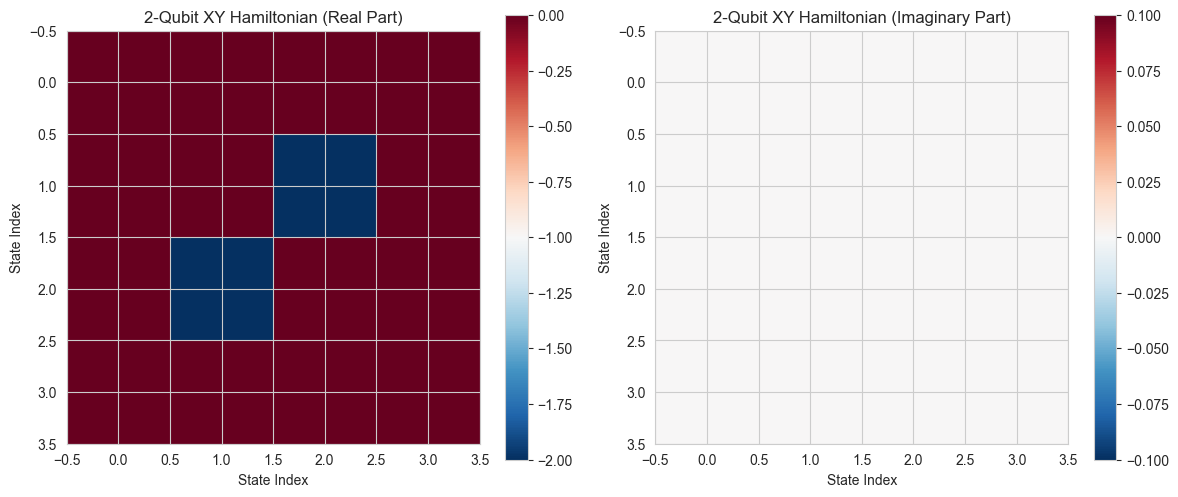

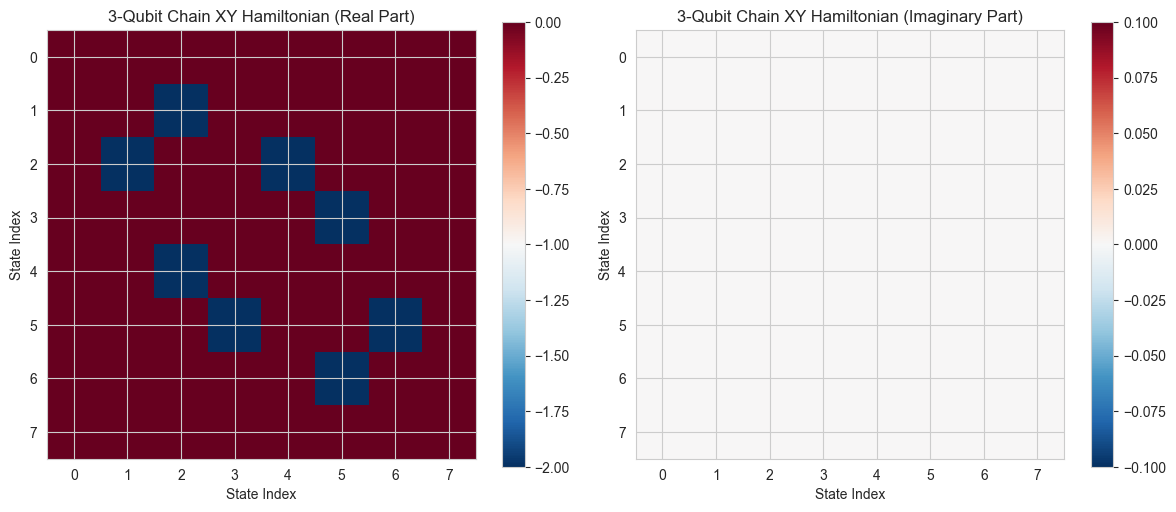

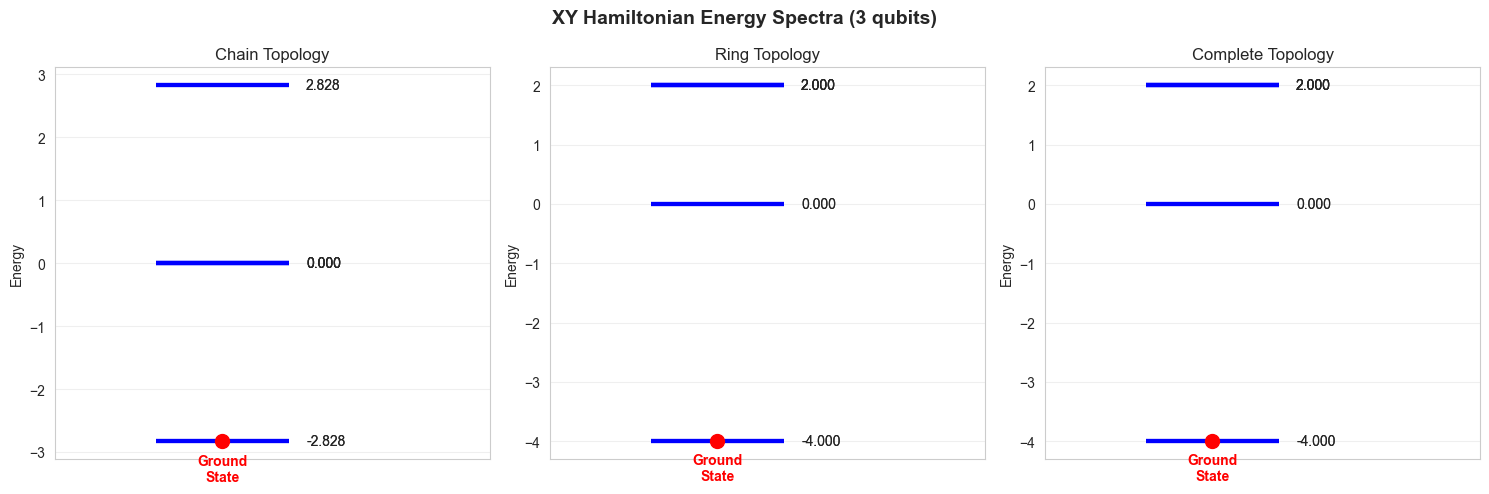


XY HAMILTONIAN SUMMARY
✓ Two equivalent formulations: X_i X_j + Y_i Y_j  and  σ+_i σ-_j + σ-_i σ+_j
✓ Conserves total magnetization (S_z)
✓ Enables spin exchange and quantum superpositions
✓ Different topologies give different energy spectra
✓ Fundamental model in quantum many-body physics

Use these matrices for quantum simulations, QAOA, or VQE studies!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import seaborn as sns

class XYHamiltonianDemo:
    """
    Demonstration of XY Hamiltonian: theory, matrix representations, and properties
    
    The XY Hamiltonian describes quantum spins interacting through X and Y components:
    H_XY = -J ∑_{⟨i,j⟩} (X_i X_j + Y_i Y_j)
    
    This is also equivalent to:
    H_XY = -J/2 ∑_{⟨i,j⟩} (σ+_i σ-_j + σ-_i σ+_j)
    where σ± are spin raising/lowering operators
    """
    
    def __init__(self):
        # Pauli matrices
        self.sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
        self.sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
        self.sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
        self.identity = np.eye(2, dtype=complex)
        
        # Spin raising and lowering operators
        self.sigma_plus = 0.5 * (self.sigma_x + 1j * self.sigma_y)   # |0⟩⟨1|
        self.sigma_minus = 0.5 * (self.sigma_x - 1j * self.sigma_y)  # |1⟩⟨0|
        
        print("XY Hamiltonian Demo")
        print("="*50)
        print("Pauli Matrices:")
        print("σ_x =", self.sigma_x.real)
        print("σ_y =", self.sigma_y)
        print("σ_z =", self.sigma_z.real)
        print("\nSpin operators:")
        print("σ+ =", self.sigma_plus)
        print("σ- =", self.sigma_minus)
        print("="*50)
    
    def create_single_qubit_operator(self, n_qubits, qubit_idx, operator):
        """Create single-qubit operator acting on qubit_idx in n-qubit system."""
        op_list = [self.identity] * n_qubits
        op_list[qubit_idx] = operator
        
        result = op_list[0]
        for op in op_list[1:]:
            result = np.kron(result, op)
        
        return result
    
    def create_xy_hamiltonian_explicit(self, n_qubits, J=1.0, topology='chain'):
        """
        Create XY Hamiltonian using explicit X_i X_j + Y_i Y_j terms.
        
        H_XY = -J ∑_{⟨i,j⟩} (X_i X_j + Y_i Y_j)
        """
        n_states = 2**n_qubits
        H = np.zeros((n_states, n_states), dtype=complex)
        
        # Define connectivity based on topology
        if topology == 'chain':
            # Linear chain: each qubit connected to nearest neighbors
            connections = [(i, i+1) for i in range(n_qubits-1)]
        elif topology == 'ring':
            # Ring: linear chain + periodic boundary conditions
            connections = [(i, i+1) for i in range(n_qubits-1)] + [(n_qubits-1, 0)]
        elif topology == 'complete':
            # Complete graph: all-to-all connections
            connections = [(i, j) for i in range(n_qubits) for j in range(i+1, n_qubits)]
        else:
            raise ValueError("Topology must be 'chain', 'ring', or 'complete'")
        
        print(f"\nCreating XY Hamiltonian ({topology} topology):")
        print(f"Connections: {connections}")
        
        # Add X_i X_j + Y_i Y_j terms for each connected pair
        for i, j in connections:
            # Create X_i and X_j operators
            X_i = self.create_single_qubit_operator(n_qubits, i, self.sigma_x)
            X_j = self.create_single_qubit_operator(n_qubits, j, self.sigma_x)
            
            # Create Y_i and Y_j operators  
            Y_i = self.create_single_qubit_operator(n_qubits, i, self.sigma_y)
            Y_j = self.create_single_qubit_operator(n_qubits, j, self.sigma_y)
            
            # Add X_i X_j + Y_i Y_j term
            H += -J * (X_i @ X_j + Y_i @ Y_j)
            
            print(f"  Added interaction between qubits {i} and {j}")
        
        return H, connections
    
    def create_xy_hamiltonian_ladder(self, n_qubits, J=1.0, topology='chain'):
        """
        Create XY Hamiltonian using ladder operators (alternative form).
        
        H_XY = -J/2 ∑_{⟨i,j⟩} (σ+_i σ-_j + σ-_i σ+_j)
        
        This is equivalent to the X_i X_j + Y_i Y_j form.
        """
        n_states = 2**n_qubits
        H = np.zeros((n_states, n_states), dtype=complex)
        
        # Define connectivity
        if topology == 'chain':
            connections = [(i, i+1) for i in range(n_qubits-1)]
        elif topology == 'ring':
            connections = [(i, i+1) for i in range(n_qubits-1)] + [(n_qubits-1, 0)]
        elif topology == 'complete':
            connections = [(i, j) for i in range(n_qubits) for j in range(i+1, n_qubits)]
        
        print(f"\nCreating XY Hamiltonian using ladder operators:")
        
        # Add σ+_i σ-_j + σ-_i σ+_j terms
        for i, j in connections:
            # Create σ+_i and σ-_j operators
            sigma_plus_i = self.create_single_qubit_operator(n_qubits, i, self.sigma_plus)
            sigma_minus_j = self.create_single_qubit_operator(n_qubits, j, self.sigma_minus)
            
            # Create σ-_i and σ+_j operators
            sigma_minus_i = self.create_single_qubit_operator(n_qubits, i, self.sigma_minus)
            sigma_plus_j = self.create_single_qubit_operator(n_qubits, j, self.sigma_plus)
            
            # Add σ+_i σ-_j + σ-_i σ+_j term
            H += -J/2 * (sigma_plus_i @ sigma_minus_j + sigma_minus_i @ sigma_plus_j)
        
        return H
    
    def analyze_xy_hamiltonian(self, H, n_qubits, connections):
        """Analyze properties of the XY Hamiltonian."""
        print(f"\nXY Hamiltonian Analysis ({n_qubits} qubits):")
        print("="*40)
        
        # Check if Hamiltonian is Hermitian
        is_hermitian = np.allclose(H, H.conj().T)
        print(f"Hermitian: {is_hermitian}")
        
        # Check if imaginary parts are negligible (should be for proper XY model)
        max_imag = np.max(np.abs(H.imag))
        print(f"Maximum imaginary part: {max_imag:.2e}")
        
        # Eigenvalue analysis
        eigenvals, eigenvecs = eigh(H)
        print(f"Ground state energy: {eigenvals[0]:.4f}")
        print(f"Energy spectrum: {eigenvals}")
        
        # Check for symmetries
        print(f"\nSymmetry Analysis:")
        
        # Total spin in Z direction (should be conserved in XY model)
        total_Sz = np.zeros_like(H)
        for i in range(n_qubits):
            Sz_i = self.create_single_qubit_operator(n_qubits, i, self.sigma_z)
            total_Sz += 0.5 * Sz_i
        
        # Check if [H, S_z] = 0 (S_z conservation)
        commutator = H @ total_Sz - total_Sz @ H
        sz_conserved = np.allclose(commutator, 0)
        print(f"S_z conservation: {sz_conserved}")
        
        return eigenvals, eigenvecs
    
    def visualize_hamiltonian_matrix(self, H, title="XY Hamiltonian Matrix"):
        """Visualize the Hamiltonian matrix structure."""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        # Real part
        im1 = ax1.imshow(H.real, cmap='RdBu_r', interpolation='nearest')
        ax1.set_title(f"{title} (Real Part)")
        ax1.set_xlabel("State Index")
        ax1.set_ylabel("State Index")
        plt.colorbar(im1, ax=ax1)
        
        # Imaginary part
        im2 = ax2.imshow(H.imag, cmap='RdBu_r', interpolation='nearest')
        ax2.set_title(f"{title} (Imaginary Part)")
        ax2.set_xlabel("State Index")
        ax2.set_ylabel("State Index")
        plt.colorbar(im2, ax=ax2)
        
        plt.tight_layout()
        return fig
    
    def compare_formulations(self, n_qubits=3):
        """Compare the two equivalent formulations of XY Hamiltonian."""
        print(f"\nComparing XY Hamiltonian formulations ({n_qubits} qubits):")
        print("="*60)
        
        # Method 1: X_i X_j + Y_i Y_j
        H1, connections = self.create_xy_hamiltonian_explicit(n_qubits, J=1.0, topology='chain')
        
        # Method 2: σ+_i σ-_j + σ-_i σ+_j  
        H2 = self.create_xy_hamiltonian_ladder(n_qubits, J=1.0, topology='chain')
        
        # Check if they're equivalent
        difference = np.max(np.abs(H1 - H2))
        print(f"\nMaximum difference between formulations: {difference:.2e}")
        print(f"Are they equivalent? {difference < 1e-10}")
        
        return H1, H2
    
    def demonstrate_xy_properties(self):
        """Demonstrate key properties of XY Hamiltonian."""
        print("\nDemonstrating XY Hamiltonian Properties:")
        print("="*50)
        
        # 2-qubit case (simplest non-trivial example)
        print("\n1. Two-qubit XY Hamiltonian:")
        H_2q, _ = self.create_xy_hamiltonian_explicit(2, J=1.0, topology='chain')
        
        print("Matrix representation:")
        print(H_2q.real)
        
        # Show basis states
        print("\nComputational basis: |00⟩, |01⟩, |10⟩, |11⟩")
        
        # Eigenvalue analysis
        eigenvals, eigenvecs = eigh(H_2q)
        print(f"\nEigenvalues: {eigenvals}")
        
        # Show ground state
        ground_state = eigenvecs[:, 0]
        print(f"Ground state coefficients: {ground_state}")
        
        # Interpretation
        print("\nPhysical interpretation:")
        print("- Couples |01⟩ ↔ |10⟩ (spin exchange)")
        print("- Conserves total S_z (number of |1⟩s)")
        print("- Creates superposition of different spin configurations")
        
        return H_2q
    
    def create_comprehensive_demo(self):
        """Create comprehensive XY Hamiltonian demonstration."""
        print("\n" + "="*60)
        print("COMPREHENSIVE XY HAMILTONIAN DEMONSTRATION")
        print("="*60)
        
        # 1. Two-qubit detailed example
        H_2q = self.demonstrate_xy_properties()
        
        # 2. Compare formulations
        H1, H2 = self.compare_formulations(n_qubits=3)
        
        # 3. Analyze larger system
        print("\n2. Three-qubit chain XY Hamiltonian:")
        H_3q, connections = self.create_xy_hamiltonian_explicit(3, J=1.0, topology='chain')
        eigenvals, eigenvecs = self.analyze_xy_hamiltonian(H_3q, 3, connections)
        
        # 4. Different topologies
        print("\n3. Topology comparison (3 qubits):")
        topologies = ['chain', 'ring', 'complete']
        H_dict = {}
        
        for topology in topologies:
            H, conn = self.create_xy_hamiltonian_explicit(3, J=1.0, topology=topology)
            H_dict[topology] = H
            eigenvals, _ = eigh(H)
            print(f"{topology:>10}: Ground state energy = {eigenvals[0]:.4f}")
        
        # 5. Visualizations
        fig1 = self.visualize_hamiltonian_matrix(H_2q, "2-Qubit XY Hamiltonian")
        plt.show()
        
        fig2 = self.visualize_hamiltonian_matrix(H_3q, "3-Qubit Chain XY Hamiltonian")
        plt.show()
        
        # 6. Energy spectrum comparison
        self.plot_energy_spectra(H_dict)
        
        return H_dict
    
    def plot_energy_spectra(self, H_dict):
        """Plot and compare energy spectra for different topologies."""
        fig, axes = plt.subplots(1, len(H_dict), figsize=(15, 5))
        if len(H_dict) == 1:
            axes = [axes]
        
        fig.suptitle('XY Hamiltonian Energy Spectra (3 qubits)', fontsize=14, fontweight='bold')
        
        for i, (topology, H) in enumerate(H_dict.items()):
            eigenvals, _ = eigh(H)
            
            # Plot energy levels
            for j, energy in enumerate(eigenvals):
                axes[i].hlines(energy, -0.2, 0.2, colors='blue', linewidth=3)
                axes[i].text(0.25, energy, f'{energy:.3f}', va='center', fontsize=10)
            
            axes[i].set_xlim(-0.5, 0.8)
            axes[i].set_ylabel('Energy')
            axes[i].set_title(f'{topology.title()} Topology')
            axes[i].grid(True, alpha=0.3)
            axes[i].set_xticks([])
            
            # Add ground state annotation
            axes[i].scatter([0], [eigenvals[0]], color='red', s=100, zorder=5)
            axes[i].text(0, eigenvals[0] - 0.2, 'Ground\nState', ha='center', va='top', 
                        fontweight='bold', color='red')
        
        plt.tight_layout()
        plt.show()


def print_xy_theory():
    """Print theoretical background of XY Hamiltonian."""
    theory_text = """
    XY HAMILTONIAN THEORY
    =====================
    
    The XY model is a quantum spin model where spins interact through X and Y components:
    
    H_XY = -J ∑_{⟨i,j⟩} (X_i X_j + Y_i Y_j)
    
    Alternative formulation using ladder operators:
    H_XY = -J/2 ∑_{⟨i,j⟩} (σ+_i σ-_j + σ-_i σ+_j)
    
    where:
    • J > 0: ferromagnetic coupling (prefers aligned spins in XY plane)
    • J < 0: antiferromagnetic coupling
    • σ± = (σ_x ± iσ_y)/2: spin raising/lowering operators
    
    KEY PROPERTIES:
    ===============
    1. Conserves total S_z = ∑_i σ_z^i/2 (magnetization)
    2. Allows spin exchange: |01⟩ ↔ |10⟩
    3. No single-spin Z terms → no preferred Z direction
    4. Creates quantum superpositions of spin configurations
    5. Exactly solvable in 1D using Jordan-Wigner transformation
    
    PHYSICAL APPLICATIONS:
    ======================
    • Quantum magnets with planar anisotropy
    • Superconducting qubits with XY interactions
    • Cold atoms in optical lattices
    • Quantum simulation and quantum computing
    
    RELATIONSHIP TO OTHER MODELS:
    =============================
    • XY + Ising (Z_i Z_j) terms → XYZ/Heisenberg model
    • XY + transverse field → quantum phase transitions
    • Special case of Heisenberg model with no Z-Z interactions
    """
    print(theory_text)


def main():
    """Main demonstration of XY Hamiltonian."""
    # Print theory
    print_xy_theory()
    
    # Create demo object
    demo = XYHamiltonianDemo()
    
    # Run comprehensive demonstration
    H_matrices = demo.create_comprehensive_demo()
    
    print("\n" + "="*60)
    print("XY HAMILTONIAN SUMMARY")
    print("="*60)
    print("✓ Two equivalent formulations: X_i X_j + Y_i Y_j  and  σ+_i σ-_j + σ-_i σ+_j")
    print("✓ Conserves total magnetization (S_z)")
    print("✓ Enables spin exchange and quantum superpositions")
    print("✓ Different topologies give different energy spectra")
    print("✓ Fundamental model in quantum many-body physics")
    print("\nUse these matrices for quantum simulations, QAOA, or VQE studies!")


if __name__ == "__main__":
    main()